# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
- se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
- explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
- conclusiones y comparativas son los más importantes para comenzar con Data Mining.

**Diciembre 2020**
- 1 Cargar un juego de datos
- 1.1 Leer el fichero de datos “housePrices.txt”
- 2 Consulta de los datos cargados
- 2.1 Consulta de las etiquetas de los datos
- 2.2 Consulta de datos
- 3 Preparación de los datos
- 3.1 Cambiamos los identificadores de filas y columnas
- 3.2 Filtramos los datos
- 3.3 Modificamos el contenido de los datos
- 4 Split Train-Test
- 4.1 Generamos dos conjuntos de datos train y test
- 4.2 Guardamos los ficheros train y test en formato .csv

## 1 Cargar un juego de datos
*Leer el fichero de datos “NBA_player_of_the_week.csv” y guardar los datos en un objeto con identificador denominado nba.*

In [101]:
# Instalamos librerías que vayamos a utilizar como, por ejemplo, "pandas" para la lectura del archivo *.csv
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Leemos el archivo *.csv
data = pd.read_csv('NBA_player_of_the_week.csv')

## 2 Descripción de los datos
*Describir brevemente la estructura de los datos: qué tipo de datos contiene, número de filas y columnas y nombre de las columnas. Realizar un resumen descriptivo de los datos.*

In [3]:
# Mostramos las 10 primeras filas para conocer mejor el dataset
data.head(10)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,6-4,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,6-3,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,6-6,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,6-7,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


In [4]:
# Mostramos el tipo de elemento que del que se trata: dataframe
type(data)

pandas.core.frame.DataFrame

In [5]:
# Mostramos los tipos de datos de cada columna del dataframe (todos a la vez)
data.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [6]:
# Obtenemos el número de filas conb el método ".len(DataFrame.index)", que es más rápido que el método ".shape"
print('El número de filas es: ',len(data.index))

El número de filas es:  1145


In [7]:
# Mostramos las nombres de las columnas
print('Los nombres de la columnas son: ', list(data))

Los nombres de la columnas son:  ['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player', 'Position', 'Season', 'Season short', 'Seasons in league', 'Team', 'Weight', 'Real_value']


In [8]:
# Obtenemos el número de columnas
print('El número de columnas es: ',len(list(data)))

El número de columnas es:  13


In [9]:
# Mostramos las estadísticas básicas, pero solamente de los valores numéricos
data.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


## 3.Preparación de la base de datos
### 3.1 Asignar NA a los valores ausentes en los datos de `Conference`.

In [10]:
data.Conference

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1140    West
1141    East
1142    West
1143    East
1144    West
Name: Conference, Length: 1145, dtype: object

In [11]:
# Podemos observar que la variable "Conference" ya tiene asignados valores "NaN" a los valores nulos, por tanto no habría que hacer nada en este caso

### 3.2 Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [12]:
# Convertimos la variable 'Conference' en categórica
data.Conference = data.Conference.astype('category')

# Agrupamos por la variable y contamos valores
(data
  .groupby("Conference")
  .agg(frequency=("Conference", "count")))

,frequency
Conference,
East,381
West,380


### 3.3 Comprobar que la variable tiene xxx valores ausentes

In [13]:
# Sumamos los valores nulos de la variable Conference mediante la función 'isnull()'
data.Conference.isnull().sum()

384

### 3.4 Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [14]:
# Creamos una lista con las variables que queremos convertir en categóricas
variables = ['Height', 'Player', 'Position', 'Season', 'Team', 'Weight']

In [15]:
# Utilizamos un bucle 'for' para no tener que convertir una por una
for variable in variables:
    data[variable] = data[variable].astype('category')

In [16]:
# Volvemos a mostrar los tipos de datos de cada columna del dataframe
data.dtypes

Age                     int64
Conference           category
Date                   object
Draft Year              int64
Height               category
Player               category
Position             category
Season               category
Season short            int64
Seasons in league       int64
Team                 category
Weight               category
Real_value            float64
dtype: object

### 3.5 Comprobar que estas variables no tienen valores perdidos.

In [17]:
# Comprobamos si existen valores nulos en todo el dataframe, donde aparecen las variables buscadas, para no tener que mirar una por una
data.isnull().sum()

Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
dtype: int64

### 3.6 Calcular el número de anyos que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo.

In [18]:
# Visualizamos solamente las columnas que nos interesan
data_tiempo = data[['Player', 'Draft Year', 'Season short']]

data_tiempo.head(10)

,Player,Draft Year,Season short
0,Micheal Ray Richardson,1978,1985
1,Derek Smith,1982,1985
2,Calvin Natt,1979,1985
3,Kareem Abdul-Jabbar,1969,1985
4,Larry Bird,1978,1985
5,Darrell Griffith,1980,1985
6,Sleepy Floyd,1982,1985
7,Mark Aguirre,1981,1985
8,Magic Johnson,1979,1985
9,Dominique Wilkins,1982,1985


In [19]:
# Teniendo el cuenta lo que nos pide y el dataframe anterior, simplemente vamos a restar las columna "Season short" menos la columnna "Draft Year", y lo vamos a colocar en una nueva columna "Tiempo"
data['tiempo'] = data['Season short'] - data['Draft Year']

# Visualizamos el resultado en las 10 primeras columnas del dataframe
data.head(10)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,7
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,3
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,6
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,16
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0,7
5,26,NaN,"Mar 10, 1985",1980,6-4,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0,5
6,24,NaN,"Mar 3, 1985",1982,6-3,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0,3
7,25,NaN,"Feb 24, 1985",1981,6-6,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0,4
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0,6
9,25,NaN,"Feb 3, 1985",1982,6-7,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0,3


### 3.7 ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)

In [20]:
# Calculamos directamente la moda de la columna tiempo con la función 'mode'
data.tiempo.mode()

0    7
dtype: int64

### 3.8 La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros [https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [21]:
# Visualizamos solamente las columnas que nos interesan
data_altura = data[['Player', 'Height']]

data_altura

,Player,Height
0,Micheal Ray Richardson,6-5
1,Derek Smith,6-6
2,Calvin Natt,6-6
3,Kareem Abdul-Jabbar,7-2
4,Larry Bird,6-9
...,...,...
1140,James Harden,196cm
1141,Victor Oladipo,193cm
1142,DeMarcus Cousins,211cm
1143,Giannis Antetokounmpo,211cm


In [22]:
# Como la altura ahora mismo es una categórica, convertimos la variable en una cadena de texto
data.Height = data.Height.astype('str')

In [23]:
# Utilizamos un bucle FOR...LOOP para diferenciar las alturas que están expresadas en cm de las que están en pies y pulgadas.
# Las que están en 'cm', nos quedamos solo con el número y las que tienen un '-' (pies y pulgadas), las pasamos a 'cm':
for i in range(len(data)):
    if 'cm' in data.Height[i]:
        data.loc[i,'Height'] = data.Height[i].replace('cm', '')
    elif '-' in data.Height[i]:
        div = data.Height[i].split('-')
        data.loc[i,'Height'] = int(div[0])*30.48 + int(div[1])*2.54

In [24]:
# Como la altura ahora mismo es un 'str', lo volvemos a cambiar a número para poder operar con él.
data.Height = data.Height.astype('float')

data.Height

0       195.58
1       198.12
2       198.12
3       218.44
4       205.74
         ...  
1140    196.00
1141    193.00
1142    211.00
1143    211.00
1144    196.00
Name: Height, Length: 1145, dtype: float64

In [25]:
# Calculamos la media
data.Height.mean()

201.02310917030644

In [26]:
# Calculamos la desviación típica
data.Height.std()

9.410947284208387

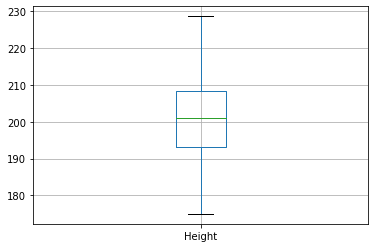

In [27]:
# Mostramos el boxplot
data.boxplot('Height')

### 3.9 El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [28]:
# Visualizamos solamente las columnas que nos interesan
data_peso = data[['Player', 'Weight']]

data_peso

,Player,Weight
0,Micheal Ray Richardson,189
1,Derek Smith,205
2,Calvin Natt,220
3,Kareem Abdul-Jabbar,225
4,Larry Bird,220
...,...,...
1140,James Harden,100kg
1141,Victor Oladipo,95kg
1142,DeMarcus Cousins,122kg
1143,Giannis Antetokounmpo,101kg


In [29]:
# Como el peso ahora mismo es una categórica, convertimos la variable en una cadena de texto
data.Weight = data.Weight.astype('str')

In [30]:
# Utilizamos un bucle FOR...LOOP para diferenciar los pesos que están en kg de los que están en libras.
# Las que están en 'kg', nos quedamos solo con el número y los que están en libras los pasamos a 'kg':

for i in range(len(data)):
    if 'kg' in data.Weight[i]:
        data.loc[i,'Weight'] = data.Weight[i].replace('kg', '')
    else:
        data.loc[i,'Weight'] = int(data.Weight[i])*0.453592

In [31]:
# Como el peso ahora mismo es un 'str', lo volvemos a cambiar a número para poder operar con él.
data.Weight = data.Weight.astype('float')

data.Weight

0        85.728888
1        92.986360
2        99.790240
3       102.058200
4        99.790240
           ...    
1140    100.000000
1141     95.000000
1142    122.000000
1143    101.000000
1144    100.000000
Name: Weight, Length: 1145, dtype: float64

In [32]:
# Calculamos la media
data.Weight.mean()

102.51357129781692

In [33]:
# Calculamos la desviación típica
data.Weight.std()

14.323385338120044

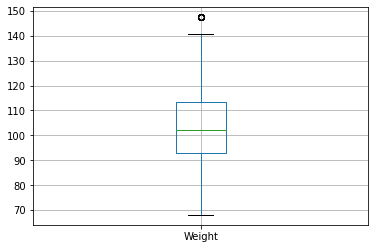

In [34]:
# Mostramos el boxplot
data.boxplot('Weight')

## 4 Información sobre posiciones en el campo y equipos.
### 4.1 Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [35]:
# Visualizamos la columna que nos interesa
data[['Player', 'Position']]

,Player,Position
0,Micheal Ray Richardson,PG
1,Derek Smith,SG
2,Calvin Natt,F
3,Kareem Abdul-Jabbar,C
4,Larry Bird,SF
...,...,...
1140,James Harden,SG
1141,Victor Oladipo,G
1142,DeMarcus Cousins,C
1143,Giannis Antetokounmpo,F


In [36]:
# Como Position ahora mismo es una categórica, convertimos la variable en una cadena de texto
data.Position = data.Position.astype('str')

In [37]:
# Utilizamos la función 'loc' para asignar las categorías
data.loc[data.Position == 'F', 'Position'] = 'Forward'
data.loc[data.Position == 'F-C', 'Position'] = 'Forward'
data.loc[data.Position == 'FC', 'Position'] = 'Forward'
data.loc[data.Position == 'G', 'Position'] = 'Guard'
data.loc[data.Position == 'G-F', 'Position'] = 'Guard'
data.loc[data.Position == 'GF', 'Position'] = 'Guard'
data.loc[data.Position == 'PG', 'Position'] = 'Point Guard'
data.loc[data.Position == 'SG', 'Position'] = 'Shooting Guard'
data.loc[data.Position == 'SF', 'Position'] = 'Small Forward'
data.loc[data.Position == 'PF', 'Position'] = 'Power Forward'
data.loc[data.Position == 'C', 'Position'] = 'Center'

In [38]:
# Visualizamos la columna que nos interesa
data[['Player', 'Position']]

,Player,Position
0,Micheal Ray Richardson,Point Guard
1,Derek Smith,Shooting Guard
2,Calvin Natt,Forward
3,Kareem Abdul-Jabbar,Center
4,Larry Bird,Small Forward
...,...,...
1140,James Harden,Shooting Guard
1141,Victor Oladipo,Guard
1142,DeMarcus Cousins,Center
1143,Giannis Antetokounmpo,Forward


### 4.2 ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [39]:
# Utilizamos la función 'value_counts' para saber cuál es la posición que más se repite
data.Position.value_counts()[0:1]

Guard    228
Name: Position, dtype: int64

### 4.3 ¿Cuántos equipos distintos hay?

In [40]:
# Mediante la función 'unique' visualizamos los datos únicos de la variable 'Team', es decir, los equipos que hay. Y calculamos con la función 'len' la longitud de esa lista de equipos
f'Hay {len(data.Team.unique())} equipos distintos'

'Hay 35 equipos distintos'

### 4.4 ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [41]:
# Utililizamos la función 'value_counts' para obtener una lista ordenada de los equipos que más se repiten, y tomamos los 5 primeros valores
data.Team.value_counts()[0:5]

Los Angeles Lakers     71
San Antonio Spurs      61
Cleveland Cavaliers    59
Miami Heat             57
Houston Rockets        56
Name: Team, dtype: int64

## 5 Información sobre jugadores. Estadísticos descriptivos.
### 5.1 Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [42]:
# Utilizamos la función 'drop_duplicates' con el objetivo de eliminar las filas de nuestro DF que se repitan por la columna 'Player', y nos quedamos con el primer valor que aparezca
nba_unique = data.drop_duplicates(subset=['Player'], keep="first")

In [43]:
nba_unique

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NaN,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,85.728888,1.0,7
1,23,NaN,"Apr 7, 1985",1982,198.12,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,92.986360,1.0,3
2,28,NaN,"Apr 1, 1985",1979,198.12,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,99.790240,1.0,6
3,37,NaN,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,102.058200,1.0,16
4,28,NaN,"Mar 17, 1985",1978,205.74,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,99.790240,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,25,East,"Apr 2, 2018",2013,193.00,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,95.000000,0.5,5
1115,26,East,"Jan 29, 2018",2012,203.00,Khris Middleton,Small Forward,2017-2018,2018,5,Milwaukee Bucks,106.000000,0.5,6
1123,24,East,"Jan 2, 2018",2012,196.00,Bradley Beal,Shooting Guard,2017-2018,2018,5,Washington Wizards,94.000000,0.5,6
1137,25,East,"Nov 13, 2017",2011,206.00,Tobias Harris,Forward,2017-2018,2018,6,Detroit Pistons,107.000000,0.5,7


### 5.2 Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [44]:
# Listamos mediante la función 'sort_values' los 10 jugdores más bajos, mostrando solamente las columnas del jugador y su altura
nba_unique[['Player', 'Height']].sort_values('Height').head(10)

,Player,Height
967,Isaiah Thomas,175.26
893,Nate Robinson,175.26
110,Michael Adams,177.80
858,Ty Lawson,180.34
273,Terrell Brandon,180.34
125,Tim Hardaway,182.88
219,Kenny Anderson,182.88
278,Allen Iverson,182.88
586,Chris Paul,182.88
1014,J.J. Barea,182.88


### 5.3 Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.

In [45]:
# Invertimos el orden del listado para listar los 10 jugadores más altos
nba_unique[['Player', 'Height']].sort_values('Height', ascending=False).head(10)

,Player,Height
486,Yao Ming,228.60
236,Rik Smits,223.52
1139,Kristaps Porzingis,221.00
256,Arvydas Sabonis,220.98
483,Zydrunas Ilgauskas,220.98
3,Kareem Abdul-Jabbar,218.44
188,Dikembe Mutombo,218.44
234,Vlade Divac,215.90
115,David Robinson,215.90
868,Marc Gasol,215.90


## 6 Eliminación de outliers.
### 6.1 Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg

In [46]:
# Visualizamos los datos estadísticos de la variable peso en el DF que estamos utilizando 'nba_unique' para comprender mejor los datos qe manejamos
nba_unique.Weight.describe()

count    274.000000
mean      99.372027
std       13.343014
min       68.038800
25%       88.450440
50%       99.790240
75%      108.862080
max      147.417400
Name: Weight, dtype: float64

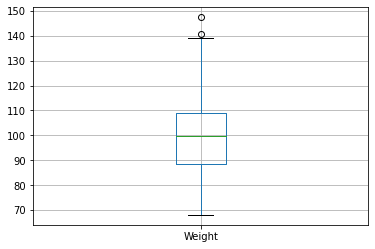

In [47]:
# Mostramos el 'boxplot' para detectar visualmente los valores atípicos
nba_unique.boxplot('Weight')

In [48]:
# Obtenemos los valores estadísicos numéricamente para poder operar con ellos
Q1 = nba_unique.Weight.quantile(0.25)
print(Q1)
Q3 = nba_unique.Weight.quantile(0.75)
print(Q3)
rango_int = Q3 - Q1
print(Q3 - Q1)
valor_maximo = nba_unique.Weight.max()
print(valor_maximo)

88.45044
108.86207999999999
20.41163999999999
147.4174


In [49]:
# Calculamos el valor del bigote superior, para conocer aquellos valores que vemos que quedan por encima (valores atípicos)
BS = (Q3 + 1.5 * rango_int)
print(BS)

139.47954


In [50]:
# Comprobamos los valores que cumplen esta condición
nba_unique.Weight[nba_unique.Weight > BS]

206    147.41740
486    140.61352
Name: Weight, dtype: float64

In [51]:
# Eliminamos aquellas filas del DF cuyos valores de la variable 'Weight' (peso) estén por encima de este valor
# Generamos un nuevo dataset eliminando los valores atípicos detectados en el paso anterior
nba_avg = nba_unique.drop(nba_unique[nba_unique.Weight > BS].index)

In [52]:
nba_avg

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo
0,29,NaN,"Apr 14, 1985",1978,195.58,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,85.728888,1.0,7
1,23,NaN,"Apr 7, 1985",1982,198.12,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,92.986360,1.0,3
2,28,NaN,"Apr 1, 1985",1979,198.12,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,99.790240,1.0,6
3,37,NaN,"Mar 24, 1985",1969,218.44,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,102.058200,1.0,16
4,28,NaN,"Mar 17, 1985",1978,205.74,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,99.790240,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,25,East,"Apr 2, 2018",2013,193.00,Victor Oladipo,Guard,2017-2018,2018,4,Indiana Pacers,95.000000,0.5,5
1115,26,East,"Jan 29, 2018",2012,203.00,Khris Middleton,Small Forward,2017-2018,2018,5,Milwaukee Bucks,106.000000,0.5,6
1123,24,East,"Jan 2, 2018",2012,196.00,Bradley Beal,Shooting Guard,2017-2018,2018,5,Washington Wizards,94.000000,0.5,6
1137,25,East,"Nov 13, 2017",2011,206.00,Tobias Harris,Forward,2017-2018,2018,6,Detroit Pistons,107.000000,0.5,7


### 6.2 Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg

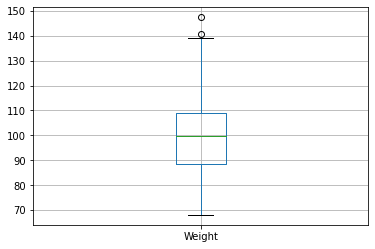

In [53]:
# Mostramos el boxplot de cada uno de los DF
nba_unique.boxplot('Weight')

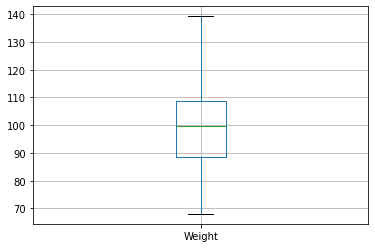

In [54]:
nba_avg.boxplot('Weight')

In [55]:
# Podemos observar claramente, de forma más visual, cómo desaparecen los valores atípicos mencionados anteriormente.

### 6.3 Interpretar los resultados

In [56]:
# Visualizamos el resumen de los datos estadísticos de cada uno de los dataset cuyos datos queremos interpretar
nba_unique.Weight.describe()

count    274.000000
mean      99.372027
std       13.343014
min       68.038800
25%       88.450440
50%       99.790240
75%      108.862080
max      147.417400
Name: Weight, dtype: float64

In [57]:
nba_avg.Weight.describe()

count    272.000000
mean      99.043766
std       12.823713
min       68.038800
25%       88.450440
50%       99.790240
75%      108.862080
max      139.252744
Name: Weight, dtype: float64

## 7 Clasificación de jugadores
### 7.1 Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:
- bajo: los 50 jugadores más bajos
- alto: los 50 jugadores más altos
- normal: el resto de jugadores

In [58]:
# Añadimos una nueva columna a nuestro dataset 'nba.unique' considerando a todos los jugadores como normales
nba_unique['Altura'] = 'normal'

<ipython-input-58-4c2736a54a6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Altura'] = 'normal'


In [59]:
# Comprobamos que ha funcionado correctamente con un 'value_counts' del nuevo atributo
nba_unique['Altura'].value_counts()

normal    274
Name: Altura, dtype: int64

In [60]:
# Ordenamos el DF por la altura, del más bajo al más alto
nba_unique.sort_values('Height', ascending=True)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo,Altura
967,26,East,"Apr 13, 2015",2011,175.26,Isaiah Thomas,Point Guard,2014-2015,2015,3,Boston Celtics,83.914520,0.5,4,normal
893,28,East,"Feb 4, 2013",2005,175.26,Nate Robinson,Guard,2012-2013,2013,7,Chicago Bulls,81.646560,0.5,8,normal
110,26,NaN,"Dec 11, 1988",1985,177.80,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,73.935496,1.0,4,normal
858,24,West,"Mar 5, 2012",2009,180.34,Ty Lawson,Point Guard,2011-2012,2012,2,Denver Nuggets,88.450440,0.5,3,normal
273,25,NaN,"Dec 3, 1995",1991,180.34,Terrell Brandon,Point Guard,1995-1996,1996,4,Cleveland Cavaliers,81.646560,1.0,5,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,31,NaN,"Mar 31, 1996",1985,220.98,Arvydas Sabonis,Center,1995-1996,1996,0,Portland Trail Blazers,126.552168,1.0,11,normal
483,28,East,"Mar 14, 2004",1996,220.98,Zydrunas Ilgauskas,Center,2003-2004,2004,7,Cleveland Cavaliers,117.933920,0.5,8,normal
1139,22,East,"Nov 6, 2017",2015,221.00,Kristaps Porzingis,Forward,2017-2018,2018,2,New York Knicks,109.000000,0.5,3,normal
236,28,NaN,"Mar 12, 1995",1988,223.52,Rik Smits,Center,1994-1995,1995,6,Indiana Pacers,113.398000,1.0,7,normal


In [61]:
# Asignamos el valor de 'bajo' a los 50 primeros jugadores de la lista y 'alto' a los 50 últimos
nba_unique['Altura'][0:50] = 'bajo'
nba_unique['Altura'][224:274] = 'alto'

<ipython-input-61-754325afa20b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Altura'][0:50] = 'bajo'
C:\Users\RodrigodelaPlaza\anaconda3\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
C:\Users\RodrigodelaPlaza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_glo

In [62]:
# Utilizamos la función 'value_counts' de este nuevo atributo para comprobar que ha funcionado de forma correcta la asignación
nba_unique['Altura'].value_counts()

normal    174
bajo       50
alto       50
Name: Altura, dtype: int64

In [63]:
nba_unique[['Player','Altura']]

,Player,Altura
0,Micheal Ray Richardson,bajo
1,Derek Smith,bajo
2,Calvin Natt,bajo
3,Kareem Abdul-Jabbar,bajo
4,Larry Bird,bajo
...,...,...
1101,Victor Oladipo,alto
1115,Khris Middleton,alto
1123,Bradley Beal,alto
1137,Tobias Harris,alto


### 7.2 Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:
- bajo: los 50 jugadores con menor peso
- alto: los 50 jugadores con mayor peso
- normal: el resto de jugadores

In [64]:
# Añadimos una nueva columna a nuestro dataset 'nba.unique' considerando a todos los jugadores como normales
nba_unique['Peso'] = 'normal'

<ipython-input-64-362df1c20b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Peso'] = 'normal'


In [65]:
# Comprobamos que ha funcionado correctamente con un 'value_counts' del nuevo atributo
nba_unique['Peso'].value_counts()

normal    274
Name: Peso, dtype: int64

In [66]:
# Ordenamos el DF por el peso, de menor a mayor
nba_unique.sort_values('Weight', ascending=True)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo,Altura,Peso
251,25,NaN,"Nov 20, 1994",1991,182.88,Elliot Perry,Point Guard,1994-1995,1995,3,Phoenix Suns,68.038800,1.0,4,normal,normal
110,26,NaN,"Dec 11, 1988",1985,177.80,Michael Adams,Point Guard,1988-1989,1989,3,Denver Nuggets,73.935496,1.0,4,normal,normal
278,21,NaN,"Apr 13, 1997",1996,182.88,Allen Iverson,Guard,1996-1997,1997,0,Philadelphia Sixers,74.842680,1.0,1,normal,normal
611,22,East,"Nov 7, 2005",2003,182.88,T.J. Ford,Point Guard,2005-2006,2006,2,Milwaukee Bucks,74.842680,0.5,3,normal,normal
219,23,NaN,"Jan 23, 1994",1991,182.88,Kenny Anderson,Point Guard,1993-1994,1994,2,New Jersey Nets,76.203456,1.0,3,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,21,West,"Jan 26, 2009",2005,213.36,Andrew Bynum,Center,2008-2009,2009,3,Los Angeles Lakers,129.273720,0.5,4,normal,normal
625,22,East,"Mar 4, 2007",2004,208.28,Al Jefferson,Forward,2006-2007,2007,2,Boston Celtics,131.088088,0.5,3,normal,normal
878,27,West,"Apr 8, 2013",2008,210.82,Nikola Pekovic,Power Forward,2012-2013,2013,2,Minnesota Timberwolves,139.252744,0.5,5,normal,normal
486,23,West,"Mar 7, 2004",2002,228.60,Yao Ming,Center,2003-2004,2004,1,Houston Rockets,140.613520,0.5,2,normal,normal


In [67]:
# Asignamos el valor de 'bajo' a los 50 primeros jugadores de la lista y 'alto' a los 50 últimos
nba_unique['Peso'][0:50] = 'bajo'
nba_unique['Peso'][224:274] = 'alto'

<ipython-input-67-4fe8bdc16ff5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Peso'][0:50] = 'bajo'
C:\Users\RodrigodelaPlaza\anaconda3\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
C:\Users\RodrigodelaPlaza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_globa

In [68]:
# Utilizamos la función 'value_counts' de este nuevo atributo para comprobar que ha funcionado de forma correcta la asignación
nba_unique['Peso'].value_counts()

normal    174
bajo       50
alto       50
Name: Peso, dtype: int64

In [69]:
nba_unique[['Player','Peso']]

,Player,Peso
0,Micheal Ray Richardson,bajo
1,Derek Smith,bajo
2,Calvin Natt,bajo
3,Kareem Abdul-Jabbar,bajo
4,Larry Bird,bajo
...,...,...
1101,Victor Oladipo,alto
1115,Khris Middleton,alto
1123,Bradley Beal,alto
1137,Tobias Harris,alto


### 7.3 Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

In [72]:
# Convertimos la variable peso en decimal para poder operar con él
nba_unique['Weight'] = nba_unique['Weight'].astype('float')

<ipython-input-72-24a2204d9f29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_unique['Weight'] = nba_unique['Weight'].astype('float')


In [90]:
# Calculamos la media del peso (Weight) según la clasificación de altura de los jugadores con la función 'pivot table' de pandas:
media_peso = pd.pivot_table(nba_unique, values = 'Weight', index = 'Altura', aggfunc='mean', columns=None, fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

media_peso



,Weight
Altura,
alto,101.553545
bajo,95.735128
normal,99.790240


In [92]:
# Calculamos la desviación típica del peso (Weight) según la clasificación de altura de los jugadores con la función 'pivot table' de pandas:

desv_tipica_peso = pd.pivot_table(nba_unique, values = 'Weight', index = 'Altura', aggfunc='std', columns=None, fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

desv_tipica_peso

,Weight
Altura,
alto,12.294528
bajo,10.450676
normal,14.206542


### 7.4 Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

TypeError: boxplot() got multiple values for argument 'x'

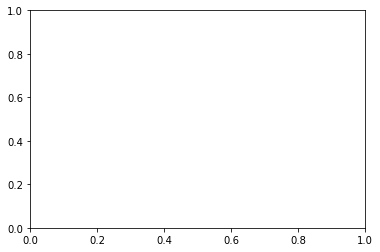

In [104]:
# Generamos los gráficos según las condiciones requeridas en el enunciado

nba_unique.boxplot(x =nba_unique['Altura'], y = nba_unique['Weight'])

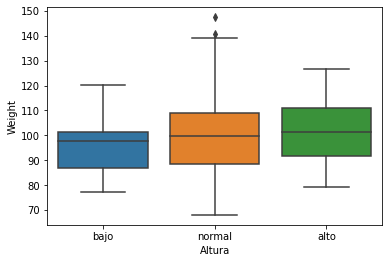

In [105]:
# Creamos las cajas de bigotes mediante la librería 'seaborn' para solventar el error

sns.boxplot(x =nba_unique['Altura'], y = nba_unique['Weight'])

### 7.5 Hacer un listado con el nombre de jugadores que tienen una altura ‘normal’ y un peso ‘alto’. Ordenar alfabéticamente por nombre.

In [106]:
# Creamos un listado que cumpla con las dos condiciones del enunciado
listado_jugadores = nba_unique[(nba_unique.Altura == 'normal') & (nba_unique.Peso == 'alto')]

listado_jugadores

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,tiempo,Altura,Peso
